In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Assignment 2/diabetes.csv')
# df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

Mounted at /content/drive


In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=0)

In [5]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [6]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
X_train=pd.DataFrame(X_train,columns=df.iloc[:,0:-1].columns)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.908329,0.915694,0.449124,0.522226,0.373635,0.378526,0.677404,1.699558
1,0.036447,-0.751822,-0.472301,0.148149,-0.699657,-0.506672,-0.070497,-0.965692
2,-1.126063,1.387632,1.063407,0.771611,5.092711,2.540941,-0.118555,-0.882403
3,-0.835435,-0.374271,-0.677062,0.023456,0.450299,-0.886043,1.100914,-0.882403
4,1.198956,-0.028183,-3.543717,-1.285816,-0.699657,-0.279050,-0.851438,0.366933
...,...,...,...,...,...,...,...,...
609,1.780211,-0.625972,0.346743,1.706805,0.833617,0.087675,-0.887481,2.449160
610,0.908329,1.198857,-0.165159,-1.285816,-0.699657,-0.228467,-0.250714,0.200355
611,0.036447,-0.846210,-0.216350,0.085802,-0.699657,-0.949272,-0.956564,-1.048981
612,2.070839,-1.129373,0.244363,-1.285816,-0.699657,-0.266404,-0.500014,0.117066


In [8]:
X_test=pd.DataFrame(X_test,columns=df.iloc[:,0:-1].columns)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.835435,2.457359,0.346743,1.395074,-0.699657,1.352245,2.785944,-0.965692
1,-0.544808,-0.437196,0.244363,0.584572,0.152162,0.176195,-0.187638,-0.882403
2,0.036447,-1.412536,-0.369921,-1.285816,-0.699657,0.226778,-0.226685,-0.715825
3,0.327074,1.419095,0.141982,-0.101237,0.791026,-0.810169,0.362024,1.449691
4,-1.126063,-0.311346,-0.216350,-1.285816,-0.699657,-0.961917,0.581288,-0.216090
...,...,...,...,...,...,...,...,...
149,-0.544808,-0.500121,0.551504,1.519767,0.927317,0.188841,0.734473,-0.382668
150,0.036447,-1.129373,-0.574682,0.085802,-0.282266,-0.557255,-0.481993,-0.465958
151,0.036447,0.663993,0.858646,-1.285816,-0.699657,1.491348,0.536234,-0.965692
152,-0.254181,-0.154033,0.244363,-0.350622,0.194753,-0.746941,-1.079713,-0.799114


# **Logistic Regression**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report


In [10]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8246753246753247

In [11]:

conf_mtrix=confusion_matrix(y_pred,y_test)
classification_rep=classification_report(y_pred,y_test)
print("Confusion_Matrix:");print(conf_mtrix)
print("Classification_Report:");print(classification_rep)

Confusion_Matrix:
[[98 18]
 [ 9 29]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       116
           1       0.62      0.76      0.68        38

    accuracy                           0.82       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.84      0.82      0.83       154



Text(0.5, 1.0, 'Confusion_Matrix')

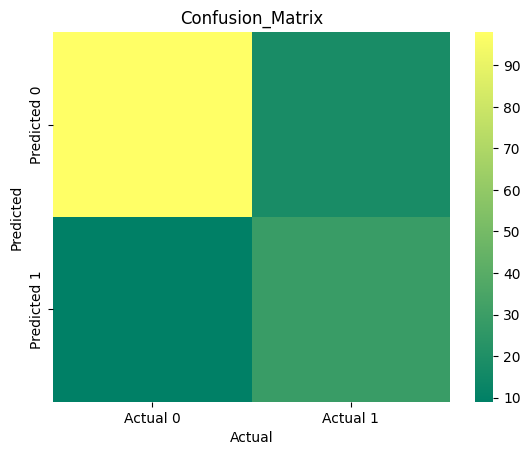

In [12]:
sns.heatmap(conf_mtrix,cmap='summer',yticklabels=['Predicted 0', 'Predicted 1'],
            xticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion_Matrix')

# **SVM**

In [13]:
from sklearn.svm import SVC

In [14]:
svm_model=SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7922077922077922

In [15]:
confusion_matrix(y_test,y_pred)

array([[96, 11],
       [21, 26]])

In [16]:
conf_mtrix=confusion_matrix(y_pred,y_test)
classification_rep=classification_report(y_pred,y_test)
print("Confusion_Matrix:");print(conf_mtrix)
print("Classification_Report:");print(classification_rep)

Confusion_Matrix:
[[96 21]
 [11 26]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       117
           1       0.55      0.70      0.62        37

    accuracy                           0.79       154
   macro avg       0.73      0.76      0.74       154
weighted avg       0.81      0.79      0.80       154



Text(0.5, 1.0, 'Confusion_Matrix')

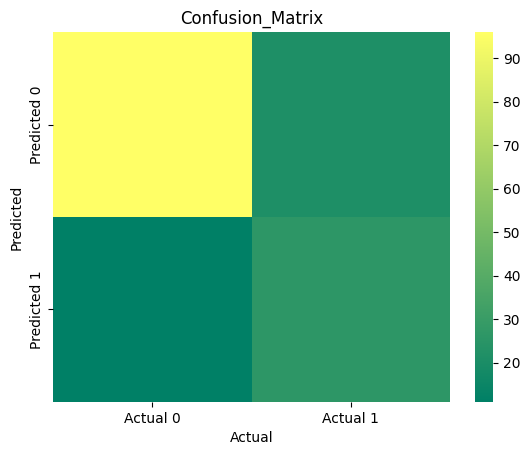

In [17]:
sns.heatmap(conf_mtrix,cmap='summer',yticklabels=['Predicted 0', 'Predicted 1'],
            xticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion_Matrix')

# **Cross Validation**

In [18]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [19]:
X = df[['Pregnancies', 'Age']]

In [20]:
y = df['Outcome']

In [21]:
print(X,y)

     Pregnancies  Age
0              6   50
1              1   31
2              8   32
3              1   21
4              0   33
..           ...  ...
763           10   63
764            2   27
765            5   30
766            1   47
767            1   23

[768 rows x 2 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [22]:
model = LinearRegression()

In [23]:
loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')


In [24]:
mse_scores = -scores

In [25]:
print("MSE Scores for each fold:", mse_scores)

MSE Scores for each fold: [0.24953088 0.07935767 0.34223539 0.0457495  0.52796386 0.12183788
 0.51418394 0.19208845 0.30950594 0.18988899 0.10913582 0.28696984
 0.39540843 0.28883059 0.26184306 0.36344778 0.54755775 0.37184421
 0.08723447 0.50971703 0.08496907 0.29363604 0.2930416  0.34614249
 0.16084719 0.23739688 0.27860041 0.04868599 0.47269476 0.16259912
 0.31024366 0.4946519  0.06646366 0.12563863 0.297908   0.12296043
 0.24801633 0.22197514 0.53120163 0.24797797 0.08108063 0.18835587
 0.25929795 0.17415437 0.20643543 0.60918498 0.07187223 0.05721122
 0.37184421 0.12023536 0.04868599 0.06136684 0.12183788 0.16741576
 0.21900626 0.0457495  0.2930416  0.06937064 0.12474448 0.04087205
 0.05403175 0.28815263 0.1518119  0.0638486  0.28576826 0.13143766
 0.48094098 0.2114382  0.05805552 0.09617771 0.52129045 0.10378474
 0.18240416 0.08021955 0.04868599 0.04868599 0.21266839 0.10815632
 0.59860806 0.0638486  0.06646366 0.05721122 0.18253259 0.04087205
 0.36610093 0.07450752 0.36626996 0.

In [26]:
print("Mean MSE:", np.mean(mse_scores))

Mean MSE: 0.21337564289587796


In [33]:
from imblearn.over_sampling import SMOTE
s1=SMOTE()
x_data,y_data=s1.fit_resample(X,y)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=2)

In [34]:
l1=LogisticRegression()
l1.fit(x_train,y_train)


LogisticRegression()

In [35]:
kf=KFold(n_splits=5)
kf.get_n_splits(X)

scores=cross_val_score(l1,x_data,y_data,cv=kf)
print(scores)
print(np.mean(scores)*100)

[0.645 0.615 0.62  0.695 0.25 ]
56.49999999999999


In [36]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [57]:
x_data_np = x_data.to_numpy()
y_data_np = y_data.to_numpy()

for train_data, test_data in kf.split(x_data_np):
    x_train, x_test = x_data_np[train_data], x_data_np[test_data]
    y_train, y_test = y_data_np[train_data], y_data_np[test_data]

In [58]:
    scores=cross_val_score(l1,x_train,y_train,cv=kf)
    print(scores)
    print(np.mean(scores)*100)
    print("Y data Counter: ",Counter(y_test))


[0.6875  0.6     0.61875 0.71875 0.54375]
63.375
Y data Counter:  Counter({1: 200})


# **Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt=DecisionTreeClassifier(max_depth=7,criterion='gini')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.6

In [40]:
conf_mtrix=confusion_matrix(y_pred,y_test)
classification_rep=classification_report(y_pred,y_test)
print("Confusion_Matrix:");print(conf_mtrix)
print("Classification_Report:");print(classification_rep)

Confusion_Matrix:
[[45 34]
 [46 75]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        79
           1       0.69      0.62      0.65       121

    accuracy                           0.60       200
   macro avg       0.59      0.59      0.59       200
weighted avg       0.61      0.60      0.60       200



Text(0.5, 1.0, 'Confusion_Matrix')

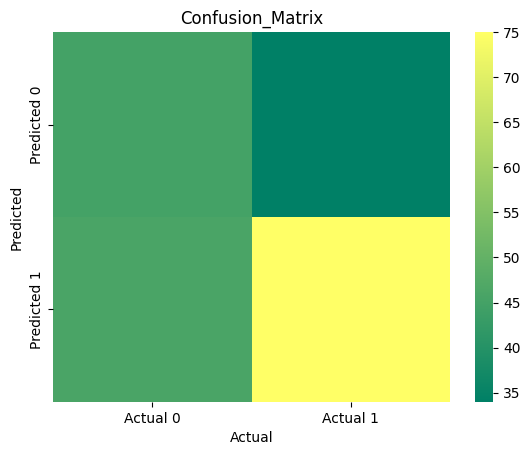

In [41]:

sns.heatmap(conf_mtrix,cmap='summer',yticklabels=['Predicted 0', 'Predicted 1'],
            xticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion_Matrix')

# **Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
rf=RandomForestClassifier(n_estimators=170,max_depth=7,max_features='sqrt')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.605

In [44]:
conf_mtrix=confusion_matrix(y_pred,y_test)
classification_rep=classification_report(y_pred,y_test)
print("Confusion_Matrix:");print(conf_mtrix)
print("Classification_Report:");print(classification_rep)

Confusion_Matrix:
[[43 31]
 [48 78]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.47      0.58      0.52        74
           1       0.72      0.62      0.66       126

    accuracy                           0.60       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.63      0.60      0.61       200



Text(0.5, 1.0, 'Confusion_Matrix')

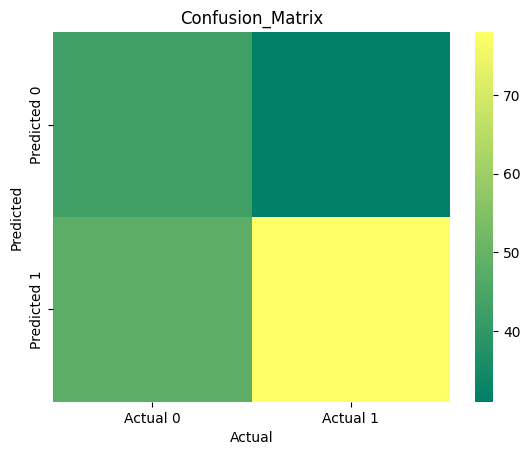

In [45]:
sns.heatmap(conf_mtrix,cmap='summer',yticklabels=['Predicted 0', 'Predicted 1'],
            xticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion_Matrix')

# **Regressor**

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dt_regressor = DecisionTreeRegressor()

In [48]:
lvm = LeaveOneOut()
scores = cross_val_score(dt_regressor, x_data, y_data, cv=lvm, scoring='neg_mean_squared_error')


In [49]:
mse_scores = -scores
print("MSE Scores for each fold:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

MSE Scores for each fold: [0.         1.         0.         0.00756144 0.         0.
 0.64       1.         1.         0.         0.11111111 1.
 0.25       1.         0.         0.         0.25       0.04
 1.         0.11111111 0.60493827 0.         0.02777778 0.
 0.25       0.25       0.         0.00907029 1.         0.25
 0.         0.18367347 0.21301775 0.         0.69444444 0.25
 0.         0.         0.29752066 0.         0.16       0.
 0.         0.         1.         0.15123457 0.49       0.
 0.04       1.         0.00907029 0.02777778 0.         1.
 0.25       0.00756144 0.02777778 0.5625     0.         0.2704
 0.00591716 0.36       1.         0.1322314  1.         1.
 0.         0.25       0.         0.44444444 0.5625     0.44444444
 0.         0.25       0.00907029 0.00907029 0.84027778 0.25
 0.12755102 0.1322314  0.21301775 0.         1.         0.2704
 0.02777778 0.29752066 1.         0.         0.         0.00591716
 0.00756144 0.         0.25       0.         0.00591716 1

In [50]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [51]:

x = pd.DataFrame(df , columns = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df.Outcome.values.reshape(-1 , 1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 1)

In [53]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [54]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7575757575757576


In [55]:
from sklearn import tree

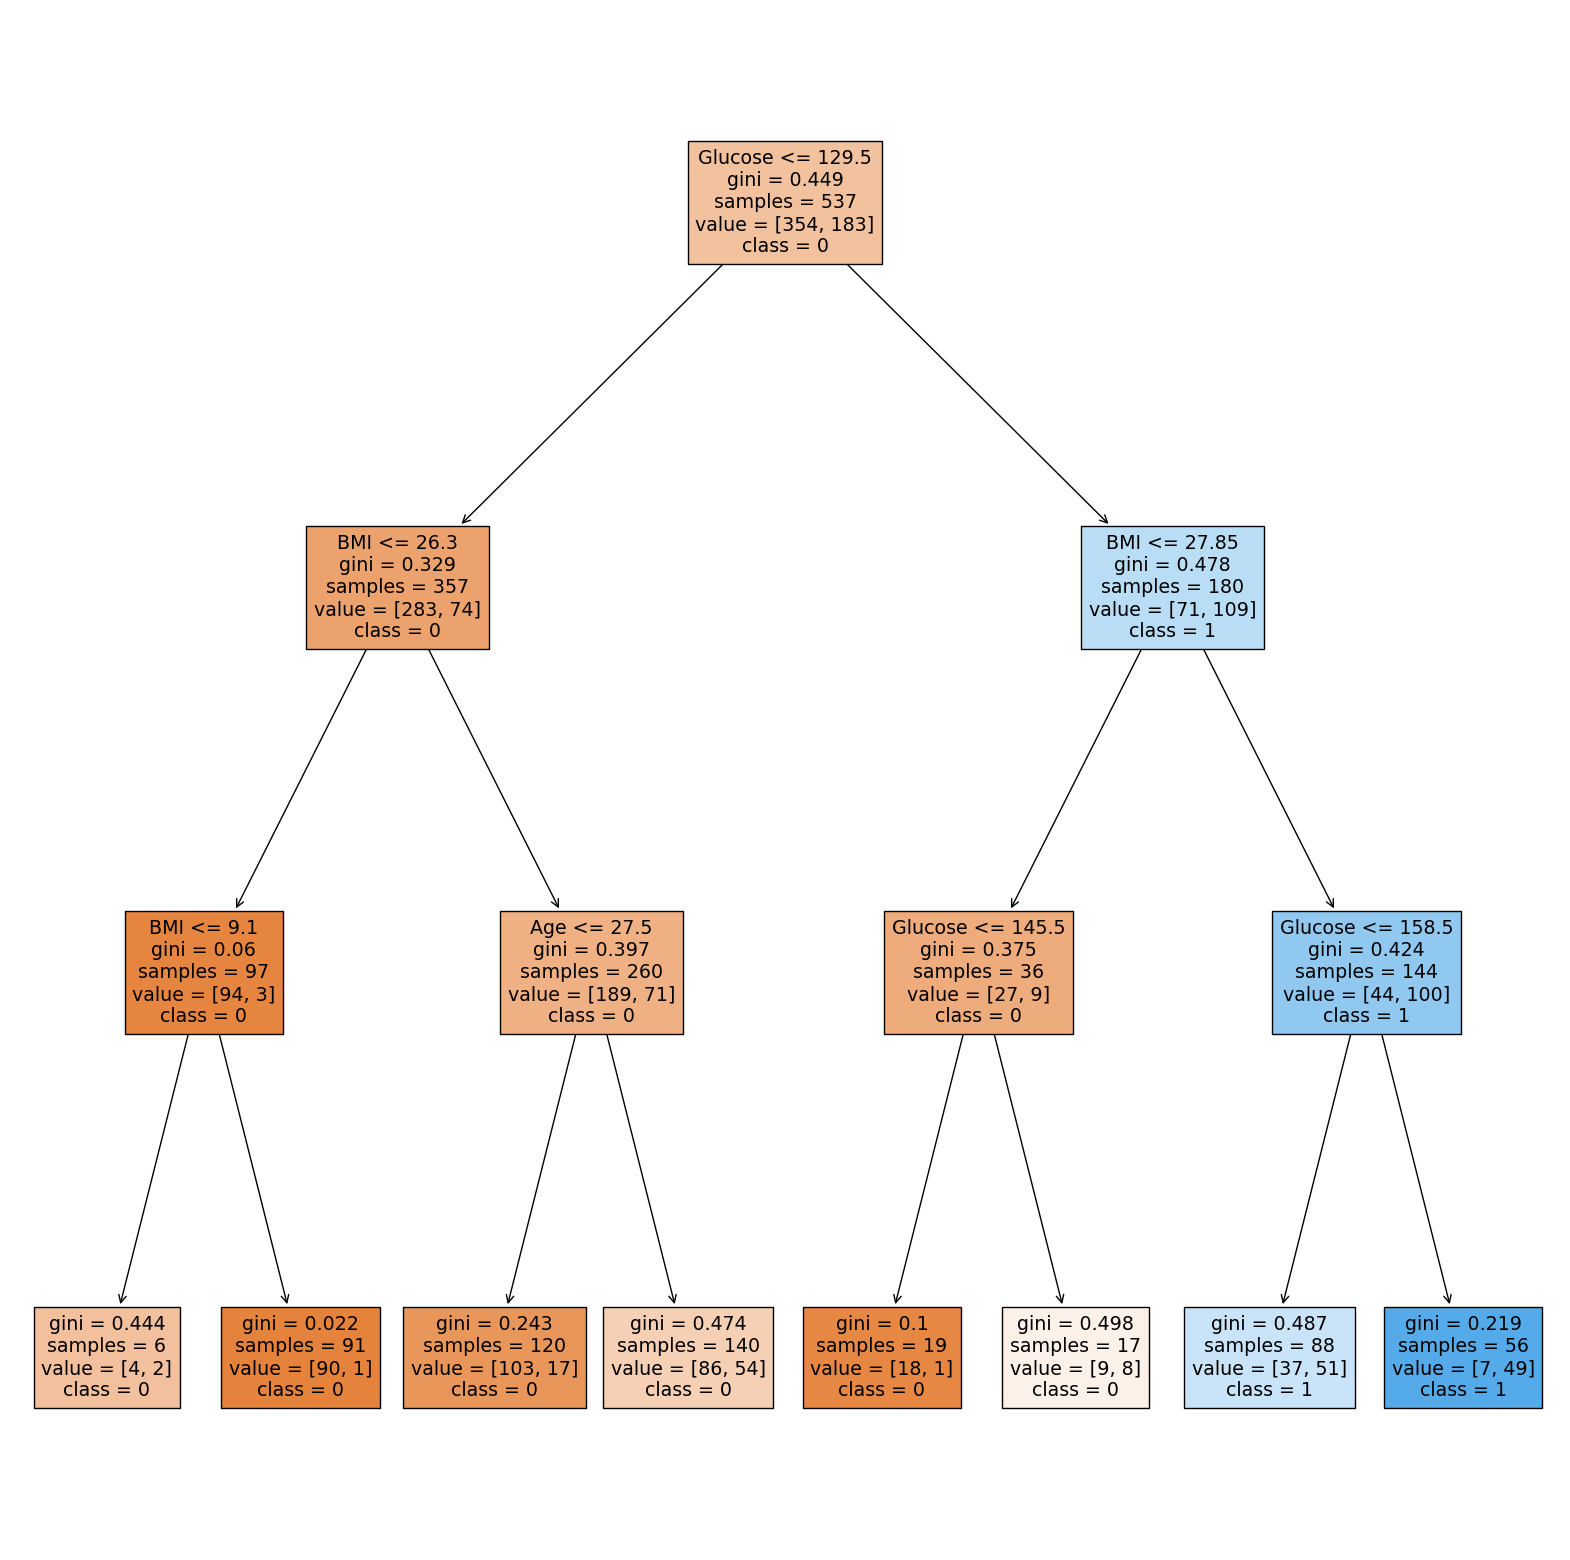

In [56]:

feature_names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']
fig = plt.figure(figsize = (20 , 20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig('tree1.png')

# **GridSearchCV**

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [69]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [61]:
grid_search.fit(x_data, y_data)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [62]:
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [63]:
print("Best MSE Score:", -grid_search.best_score_)

Best MSE Score: 0.2456882934123153


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import norm

In [65]:
param_dist={'C': norm(loc=2, scale=1)}

In [66]:
random_search = RandomizedSearchCV(SVC(kernel='rbf'), param_dist, n_iter=10, verbose=3)
random_search.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............C=1.0551394568817138;, score=0.682 total time=   0.0s
[CV 2/5] END ..............C=1.0551394568817138;, score=0.649 total time=   0.0s
[CV 3/5] END ..............C=1.0551394568817138;, score=0.656 total time=   0.0s
[CV 4/5] END ..............C=1.0551394568817138;, score=0.686 total time=   0.0s
[CV 5/5] END ..............C=1.0551394568817138;, score=0.706 total time=   0.0s
[CV 1/5] END .............C=0.32794007825601446;, score=0.708 total time=   0.0s
[CV 2/5] END .............C=0.32794007825601446;, score=0.649 total time=   0.0s
[CV 3/5] END .............C=0.32794007825601446;, score=0.662 total time=   0.0s
[CV 4/5] END .............C=0.32794007825601446;, score=0.732 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 5/5] END .............C=0.32794007825601446;, score=0.680 total time=   0.0s
[CV 1/5] END ..............C=1.8066522334752304;, score=0.688 total time=   0.0s
[CV 2/5] END ..............C=1.8066522334752304;, score=0.649 total time=   0.0s
[CV 3/5] END ..............C=1.8066522334752304;, score=0.656 total time=   0.0s
[CV 4/5] END ..............C=1.8066522334752304;, score=0.680 total time=   0.0s
[CV 5/5] END ..............C=1.8066522334752304;, score=0.693 total time=   0.0s
[CV 1/5] END ..............C=1.1642134215941473;, score=0.682 total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


[CV 2/5] END ..............C=1.1642134215941473;, score=0.649 total time=   0.1s
[CV 3/5] END ..............C=1.1642134215941473;, score=0.656 total time=   0.0s
[CV 4/5] END ..............C=1.1642134215941473;, score=0.680 total time=   0.0s
[CV 5/5] END ..............C=1.1642134215941473;, score=0.706 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/5] END ..............C=0.6914505576966814;, score=0.682 total time=   0.0s
[CV 2/5] END ..............C=0.6914505576966814;, score=0.649 total time=   0.0s
[CV 3/5] END ..............C=0.6914505576966814;, score=0.656 total time=   0.0s
[CV 4/5] END ..............C=0.6914505576966814;, score=0.693 total time=   0.0s
[CV 5/5] END ..............C=0.6914505576966814;, score=0.693 total time=   0.0s
[CV 1/5] END ..............C=2.2570455369039215;, score=0.688 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 2/5] END ..............C=2.2570455369039215;, score=0.649 total time=   0.0s
[CV 3/5] END ..............C=2.2570455369039215;, score=0.656 total time=   0.0s
[CV 4/5] END ..............C=2.2570455369039215;, score=0.693 total time=   0.0s
[CV 5/5] END ..............C=2.2570455369039215;, score=0.693 total time=   0.0s
[CV 1/5] END ...............C=-0.2644416336304083;, score=nan total time=   0.0s
[CV 2/5] END ...............C=-0.2644416336304083;, score=nan total time=   0.0s
[CV 3/5] END ...............C=-0.2644416336304083;, score=nan total time=   0.0s
[CV 4/5] END ...............C=-0.2644416336304083;, score=nan total time=   0.0s
[CV 5/5] END ...............C=-0.2644416336304083;, score=nan total time=   0.0s
[CV 1/5] END ..............C=1.2810528998824169;, score=0.682 total time=   0.0s
[CV 2/5] END ..............C=1.2810528998824169;, score=0.649 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 3/5] END ..............C=1.2810528998824169;, score=0.656 total time=   0.0s
[CV 4/5] END ..............C=1.2810528998824169;, score=0.680 total time=   0.0s
[CV 5/5] END ..............C=1.2810528998824169;, score=0.706 total time=   0.0s
[CV 1/5] END ..............C=3.6787033456558893;, score=0.675 total time=   0.0s
[CV 2/5] END ..............C=3.6787033456558893;, score=0.649 total time=   0.0s
[CV 3/5] END ..............C=3.6787033456558893;, score=0.656 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 4/5] END ..............C=3.6787033456558893;, score=0.699 total time=   0.0s
[CV 5/5] END ..............C=3.6787033456558893;, score=0.693 total time=   0.0s
[CV 1/5] END ...............C=1.334683310443007;, score=0.682 total time=   0.0s
[CV 2/5] END ...............C=1.334683310443007;, score=0.649 total time=   0.0s
[CV 3/5] END ...............C=1.334683310443007;, score=0.656 total time=   0.0s
[CV 4/5] END ...............C=1.334683310443007;, score=0.686 total time=   0.0s
[CV 5/5] END ...............C=1.334683310443007;, score=0.706 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6513763790>},
                   verbose=3)

In [67]:
random_search.best_params_

{'C': 0.32794007825601446}

# **XGBoost**

In [72]:
from xgboost import XGBClassifier

In [79]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=df.iloc[:,0:-1].columns)
X_train
X_test=pd.DataFrame(X_test,columns=df.iloc[:,0:-1].columns)

In [80]:
xgb=XGBClassifier(n_estimators=300,max_depth=6,learning_rate=0.1,gamma=2)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8376623376623377

In [81]:
conf_mtrix=confusion_matrix(y_pred,y_test)
classification_rep=classification_report(y_pred,y_test)
print("Confusion_Matrix:");print(conf_mtrix)
print("Classification_Report:");print(classification_rep)

Confusion_Matrix:
[[95 13]
 [12 34]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       108
           1       0.72      0.74      0.73        46

    accuracy                           0.84       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.84      0.84      0.84       154



Text(0.5, 1.0, 'Confusion_Matrix')

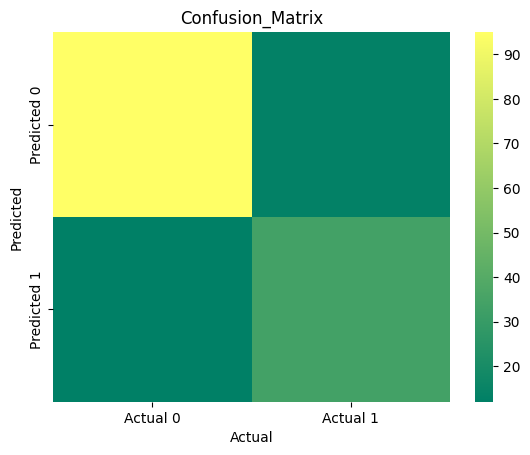

In [82]:
sns.heatmap(conf_mtrix,cmap='summer',yticklabels=['Predicted 0', 'Predicted 1'],
            xticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion_Matrix')